In [34]:
# Import pandas library
import pandas as pd

# Import matplotlib library
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

# Set up option for Pandas to display 2 decimal places
from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format

# Read members csv file
ds = pd.read_csv('members.csv')
ds

,id,age_days,gender,height_cm,weight_kg,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.00,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.00,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.00,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.00,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.00,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.00,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.00,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.00,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.00,135,80,1,2,0,0,0,1


In [35]:
# Describe function
ds.describe()

,id,age_days,gender,height_cm,weight_kg,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,"70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00"
mean,"49,972.42","19,468.87",1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.80,0.50
std,"28,851.30","2,467.25",0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.40,0.50
min,0.00,"10,798.00",1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,"25,006.75","17,664.00",1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00
50%,"50,001.50","19,703.00",1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00
75%,"74,889.25","21,327.00",2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.00,1.00
max,"99,999.00","23,713.00",2.00,250.00,200.00,"16,020.00","11,000.00",3.00,3.00,1.00,1.00,1.00,1.00


In [36]:
# Delete unnecessary columns
ds1 = ds.drop(['ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'id'], axis='columns')
ds1.head()

,age_days,gender,height_cm,weight_kg,smoke,alco,active,cardio
0,18393,2,168,62.00,0,0,1,0
1,20228,1,156,85.00,0,0,1,1
2,18857,1,165,64.00,0,0,0,1
3,17623,2,169,82.00,0,0,1,1
4,17474,1,156,56.00,0,0,0,0


In [37]:
# Check for null values
ds1.isnull().sum()

age_days     0
gender       0
height_cm    0
weight_kg    0
smoke        0
alco         0
active       0
cardio       0
dtype: int64

In [38]:
# Display only age values
ds1['age_days'].unique()

array([18393, 20228, 18857, ..., 14925, 17727, 17926], dtype=int64)

In [39]:
# Convert age from days to years
ds1['age'] = ds1['age_days'].apply(lambda x: int(x/365))
ds1.head()

,age_days,gender,height_cm,weight_kg,smoke,alco,active,cardio,age
0,18393,2,168,62.00,0,0,1,0,50
1,20228,1,156,85.00,0,0,1,1,55
2,18857,1,165,64.00,0,0,0,1,51
3,17623,2,169,82.00,0,0,1,1,48
4,17474,1,156,56.00,0,0,0,0,47


In [40]:
# Delete the age_days column
ds2 = ds1.drop(['age_days'], axis='columns')
ds2.head()

,gender,height_cm,weight_kg,smoke,alco,active,cardio,age
0,2,168,62.00,0,0,1,0,50
1,1,156,85.00,0,0,1,1,55
2,1,165,64.00,0,0,0,1,51
3,2,169,82.00,0,0,1,1,48
4,1,156,56.00,0,0,0,0,47


In [41]:
# Length of our dataset including active and inactive members
len(ds2)

70000

In [42]:
# Filter by active members
ds2 = ds2[ds2.active==1]
len(ds2)

56261

In [43]:
# Filter by members who registered for only Cardio activities
ds2 = ds2[ds2.cardio==1]
len(ds2)

27618

In [44]:
# Display 5 first members of our new dataset
ds2.head()

,gender,height_cm,weight_kg,smoke,alco,active,cardio,age
1,1,156,85.00,0,0,1,1,55
3,2,169,82.00,0,0,1,1,48
7,2,178,95.00,0,0,1,1,61
22,1,158,90.00,0,0,1,1,63
24,1,170,68.00,0,0,1,1,45


In [45]:
# Convert Height from Centimeter to Foot
ds2['height'] = ds2['height_cm'].apply(lambda x: x)
ds2.head()

,gender,height_cm,weight_kg,smoke,alco,active,cardio,age,height
1,1,156,85.00,0,0,1,1,55,156
3,2,169,82.00,0,0,1,1,48,169
7,2,178,95.00,0,0,1,1,61,178
22,1,158,90.00,0,0,1,1,63,158
24,1,170,68.00,0,0,1,1,45,170


In [46]:
# Convert Weight from Kilogram to Pound
ds2['weight'] = ds2['weight_kg'].apply(lambda x: int(x*2.205))
ds2.head()

,gender,height_cm,weight_kg,smoke,alco,active,cardio,age,height,weight
1,1,156,85.00,0,0,1,1,55,156,187
3,2,169,82.00,0,0,1,1,48,169,180
7,2,178,95.00,0,0,1,1,61,178,209
22,1,158,90.00,0,0,1,1,63,158,198
24,1,170,68.00,0,0,1,1,45,170,149


In [47]:
# Convert Weight from Kilogram to Pound

def get_weight(gender,height):
    if gender==1:
        perfect_weight = 50 + (0.91 * (height - 152.4))
        return int(perfect_weight*2.205)
    else:
        perfect_weight = 45.5 + (0.91 * (height - 152.4))
        return int(perfect_weight*2.205)

ds2['target_weight'] = ds2.apply(lambda x: get_weight(int(x.gender), int(x.height)), axis=1)
ds2.head(5)

,gender,height_cm,weight_kg,smoke,alco,active,cardio,age,height,weight,target_weight
1,1,156,85.00,0,0,1,1,55,156,187,117
3,2,169,82.00,0,0,1,1,48,169,180,133
7,2,178,95.00,0,0,1,1,61,178,209,151
22,1,158,90.00,0,0,1,1,63,158,198,121
24,1,170,68.00,0,0,1,1,45,170,149,145


In [48]:
# lambda x: x['age'] if x['gender']==1 else 0

In [49]:
# Delete height_cm and weight_kg columns
ds3 = ds2.drop(['height_cm', 'weight_kg'], axis='columns')
ds3.head()

,gender,smoke,alco,active,cardio,age,height,weight,target_weight
1,1,0,0,1,1,55,156,187,117
3,2,0,0,1,1,48,169,180,133
7,2,0,0,1,1,61,178,209,151
22,1,0,0,1,1,63,158,198,121
24,1,0,0,1,1,45,170,149,145


In [50]:
# Length of members who smoke
len(ds3[ds3.smoke==1])

2371

In [51]:
# Length of members who drink alcohol
len(ds3[ds3.alco==1])

1512

In [52]:
# Length
len(ds3)

27618

In [53]:
# Remove outliers
ds3 = ds3[(ds3.weight>88) & (ds3.weight<440) & (ds3.height>135) & (ds3.height<200)]

In [54]:
# Delete height_cm and weight_kg columns
ds4 = ds3.drop(['active', 'cardio'], axis='columns')
ds4.head(5)

,gender,smoke,alco,age,height,weight,target_weight
1,1,0,0,55,156,187,117
3,2,0,0,48,169,180,133
7,2,0,0,61,178,209,151
22,1,0,0,63,158,198,121
24,1,0,0,45,170,149,145


In [55]:
# Describe function
ds4.describe()

,gender,smoke,alco,age,height,weight,target_weight
count,"27,549.00","27,549.00","27,549.00","27,549.00","27,549.00","27,549.00","27,549.00"
mean,1.35,0.09,0.05,54.43,164.30,168.72,130.07
std,0.48,0.28,0.23,6.35,7.94,32.73,13.84
min,1.00,0.00,0.00,39.00,136.00,90.00,67.00
25%,1.00,0.00,0.00,50.00,159.00,145.00,121.00
50%,1.00,0.00,0.00,55.00,164.00,165.00,131.00
75%,2.00,0.00,0.00,59.00,170.00,187.00,139.00
max,2.00,1.00,1.00,64.00,198.00,403.00,201.00


In [56]:
# Length of final cleaned dataset(27549 rows)
len(ds4)

27549

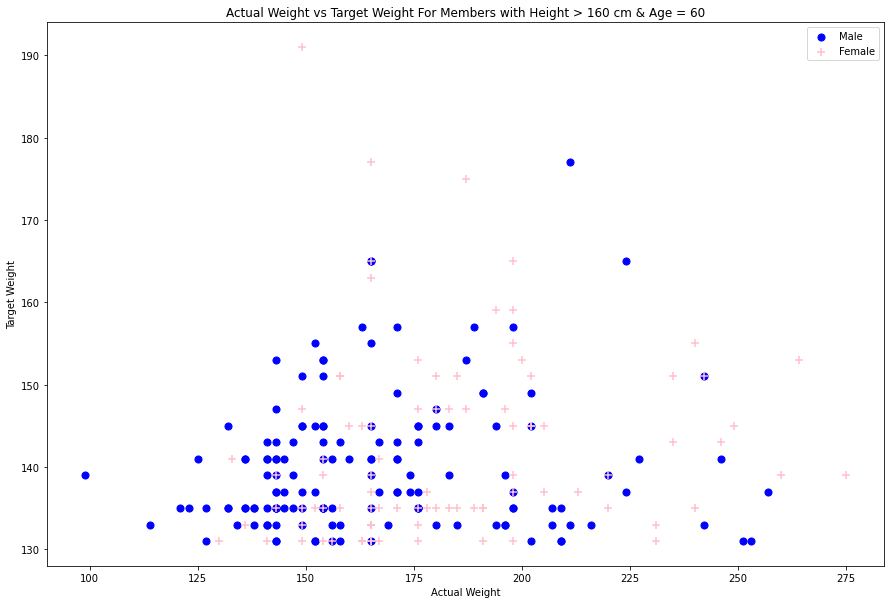

In [57]:
# Data Visualization (1) : Actual Weight vs Target Weight For Members(Heights > 160 cm & Age = 60)
def scatter_chart_1(ds4,age):
    male = ds4[(ds4.gender==1) & (ds4.age==age)]
    female = ds4[(ds4.gender==2) & (ds4.age==age)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(male.weight,male.target_weight,color='blue',label='Male', s=50)
    plt.scatter(female.weight,female.target_weight,marker='+', color='pink',label='Female', s=50)
    plt.xlabel("Actual Weight")
    plt.ylabel("Target Weight")
    plt.title("Actual Weight vs Target Weight For Members with Height > 160 cm & Age = 60")
    plt.legend()
    
scatter_chart_1(ds4[(ds4.height>160) & (ds4.target_weight>130)].head(5000),60)

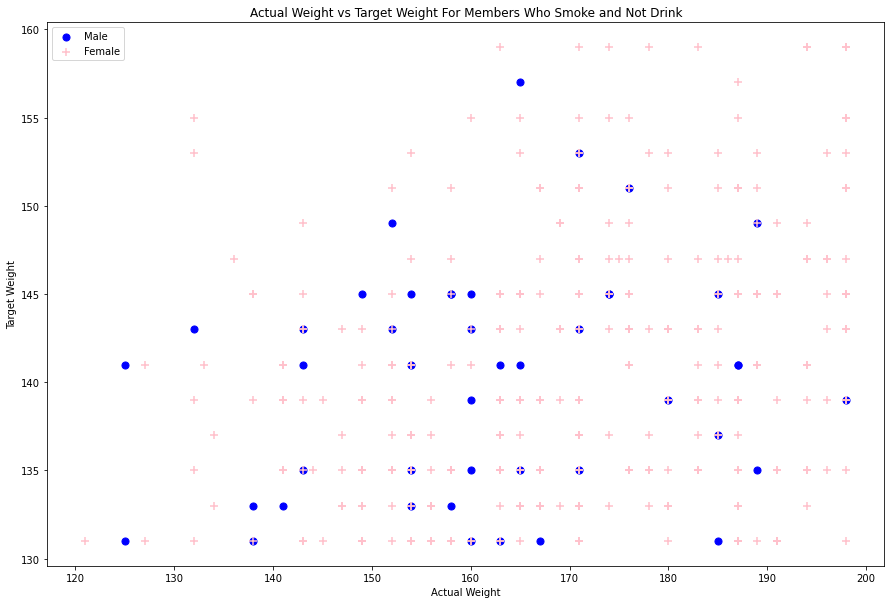

In [58]:
# Data Visualization (2) : Actual Weight vs Target Weight For Members Who Smoke and Not Drink
def scatter_chart_1(ds4,smoke, alco):
    male = ds4[(ds4.gender==1) & (ds4.smoke==smoke) & (ds4.alco==alco)]
    female = ds4[(ds4.gender==2) & (ds4.smoke==smoke) & (ds4.alco==alco)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(male.weight,male.target_weight,color='blue',label='Male', s=50)
    plt.scatter(female.weight,female.target_weight,marker='+', color='pink',label='Female', s=50)
    plt.xlabel("Actual Weight")
    plt.ylabel("Target Weight")
    plt.title("Actual Weight vs Target Weight For Members Who Smoke and Not Drink")
    plt.legend()
    
scatter_chart_1(ds4[(ds4.target_weight>130) & (ds4.target_weight<160) & (ds4.weight>120) & (ds4.weight<200)].head(5000),1,0)

Text(0.5, 1.0, 'Statistics of Target Weights')

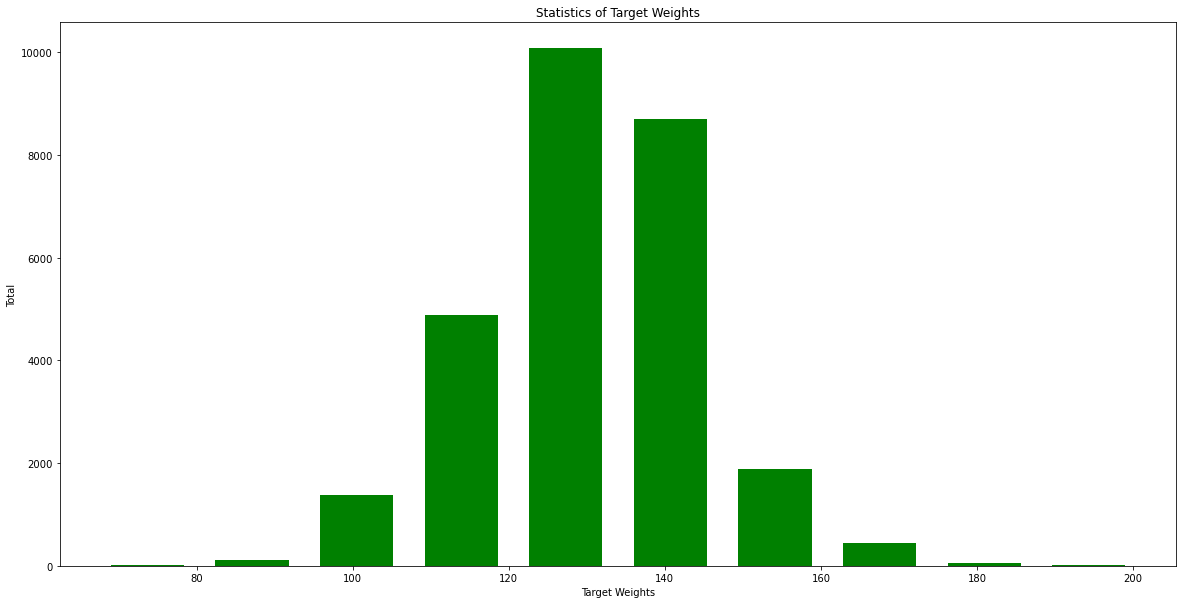

In [59]:
# Statistics of Target Weights
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(ds4.target_weight,rwidth=0.7, color='green')
plt.xlabel("Target Weights")
plt.ylabel("Total")
plt.title("Statistics of Target Weights")

In [60]:
# Start creating a Model called "weighter"
# Use 20% of dataset for testing the model
# Use 80% of dataset for training the model
# Measure accuracy of the model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = ds4.drop(columns=['target_weight'])
y = ds4['target_weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

weighter = DecisionTreeClassifier()
weighter.fit(X_train, y_train)
weighter_predictions = weighter.predict(X_test)
accuracy_score = accuracy_score(y_test, weighter_predictions)
accuracy_score


0.9990925589836661

In [61]:
# Test 1
weighter_predictions = weighter.predict([ [1, 0, 0, 55, 156, 187] ])
print('Perfect weight is:', weighter_predictions, 'Pounds')

Perfect weight is: [117] Pounds


In [62]:
# Test 2
weighter_predictions = weighter.predict([ [2, 0, 0, 48, 169, 180] ])
print('Perfect weight is:', weighter_predictions, 'Pounds')

Perfect weight is: [133] Pounds


In [63]:
# Test 3
weighter_predictions = weighter.predict([ [1, 0, 0, 48, 180, 252] ])
print('Perfect weight is:', weighter_predictions, 'Pounds')

Perfect weight is: [165] Pounds
